In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,NaN,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,NaN,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   5490 non-null   int64  
 1   YearEnd                     5490 non-null   int64  
 2   LocationAbbr                5490 non-null   object 
 3   LocationDesc                5490 non-null   object 
 4   Datasource                  5490 non-null   object 
 5   Class                       5490 non-null   object 
 6   Topic                       5490 non-null   object 
 7   Question                    5490 non-null   object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             5489 non-null   object 
 10  Data_Value                  5048 non-null   float64
 11  Data_Value_Alt              5048 non-null   float64
 12  Data_Value_Footnote_Symbol  441 non-null    object 
 13  Data_Value_Footnote         441 n

In [ ]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,5490.000000,5490.000000,0.0,5048.000000,5048.000000,5048.00000,5048.000000,5048.000000,5489.000000
mean,2012.230055,2012.230055,NaN,31.086866,31.086866,26.49164,36.311113,2009.534271,5.814903
std,1.094583,1.094583,NaN,10.559682,10.559682,10.25472,11.582135,9466.816115,3.773033
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.30000,3.000000,50.000000,1.000000
25%,2011.000000,2011.000000,NaN,23.700000,23.700000,19.40000,28.200000,494.000000,4.000000
50%,2012.000000,2012.000000,NaN,30.400000,30.400000,25.70000,36.000000,994.000000,6.000000
75%,2013.000000,2013.000000,NaN,37.200000,37.200000,32.82500,42.800000,1995.000000,9.000000
max,2015.000000,2015.000000,NaN,72.300000,72.300000,67.90000,83.200000,398316.000000,59.000000


In [ ]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
question = wrangled[wrangled['Question'] == 'Percent of adults who engage in no leisure-time physical activity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
x_all = question[question['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
x = question[question['YearStart'] == 2014][['Data_Value' ]].values
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9]])

In [ ]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
year = wrangled[wrangled['Question'] == 'Percent of adults aged 18 years and older who have obesity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
y_all = year[year['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
y = year[year['YearStart'] == 2014][['Data_Value' ]].values
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7]])

In [ ]:
x = x.reshape(-1, 1)
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9]])

In [ ]:
y = y.reshape(-1, 1)
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100)

In [ ]:
print(f'X Train Data shape{x_train.shape}')
print(f'y Train Data shape{y_train.shape}')
print(f'X Test Data shape{x_test.shape}')
print(f'y Test Data shape{y_test.shape}')

X Train Data shape(6, 1)
y Train Data shape(6, 1)
X Test Data shape(2, 1)
y Test Data shape(2, 1)


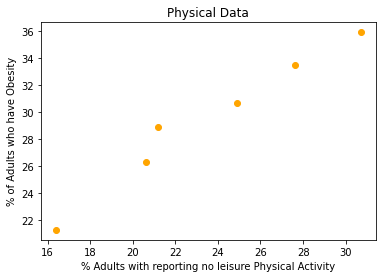

In [ ]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [ ]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 96.51%
Test Accuracy -134.64%


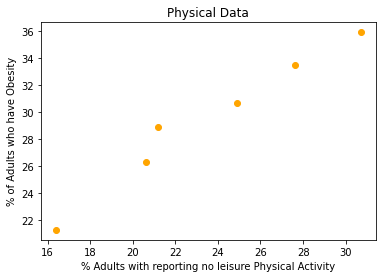

In [ ]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()